In [2]:
import numpy as np
from psiam_tied_dv_map_utils import CDF_E_minus_small_t_NORM_fn
from psiam_tied_no_dv_map_utils import CDF_E_minus_small_t_NORM_fn_vectorized, rho_A_t_fn_vectorized,P_small_t_btn_x1_x2_vectorized

In [3]:
# Parameters
ABL = 40# Arbitrary Base Level
ILD = 4           # In-Layer Depth
rate_lambda = 0.1 # Rate Lambda
T_0 = 0.1*1e-3         # Time constant
theta_E = 40     # Theta E
Z_E = 1.0         # Z E
bound = 1     # Bound flag (0 or 1)
K_max = 10       # Maximum k value for summation

# Generate a range of t values
t_values = np.linspace(0.1, 5, 100)  # Avoid t=0 to prevent division by zero


In [4]:
# Initialize lists to store CDF values
cdf_loop = []
cdf_vectorized = []

# Compute CDF using loop-based function
print("Computing CDF using loop-based function...")
for t in t_values:
    cdf = CDF_E_minus_small_t_NORM_fn(t, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max)
    cdf_loop.append(cdf)

# Compute CDF using vectorized function
print("Computing CDF using vectorized function...")
for t in t_values:
    cdf = CDF_E_minus_small_t_NORM_fn_vectorized(t, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max)
    cdf_vectorized.append(cdf)


Computing CDF using loop-based function...
Computing CDF using vectorized function...


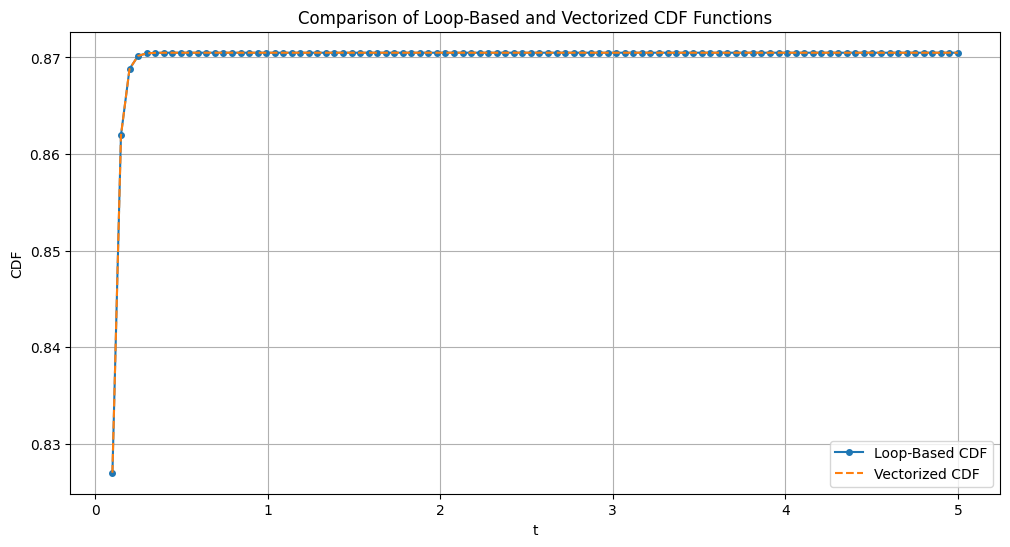

In [5]:
import matplotlib.pyplot as plt
# Convert lists to NumPy arrays for easier handling
cdf_loop = np.array(cdf_loop)
cdf_vectorized = np.array(cdf_vectorized)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t_values, cdf_loop, label='Loop-Based CDF', linestyle='-', marker='o', markersize=4)
plt.plot(t_values, cdf_vectorized, label='Vectorized CDF', linestyle='--')
plt.xlabel('t')
plt.ylabel('CDF')
plt.title('Comparison of Loop-Based and Vectorized CDF Functions')
plt.legend()
plt.grid(True)
plt.show()


Computing P_small_t_btn_x1_x2 using loop-based function...
  Completed 20 out of 100 t-values
  Completed 40 out of 100 t-values
  Completed 60 out of 100 t-values
  Completed 80 out of 100 t-values
  Completed 100 out of 100 t-values
Loop-Based Function Time: 0.0114 seconds

Computing P_small_t_btn_x1_x2 using vectorized function...
  Completed 20 out of 100 t-values
  Completed 40 out of 100 t-values
  Completed 60 out of 100 t-values
  Completed 80 out of 100 t-values
  Completed 100 out of 100 t-values
Vectorized Function Time: 0.0045 seconds

Maximum difference between loop-based and vectorized results: 2.78e-17



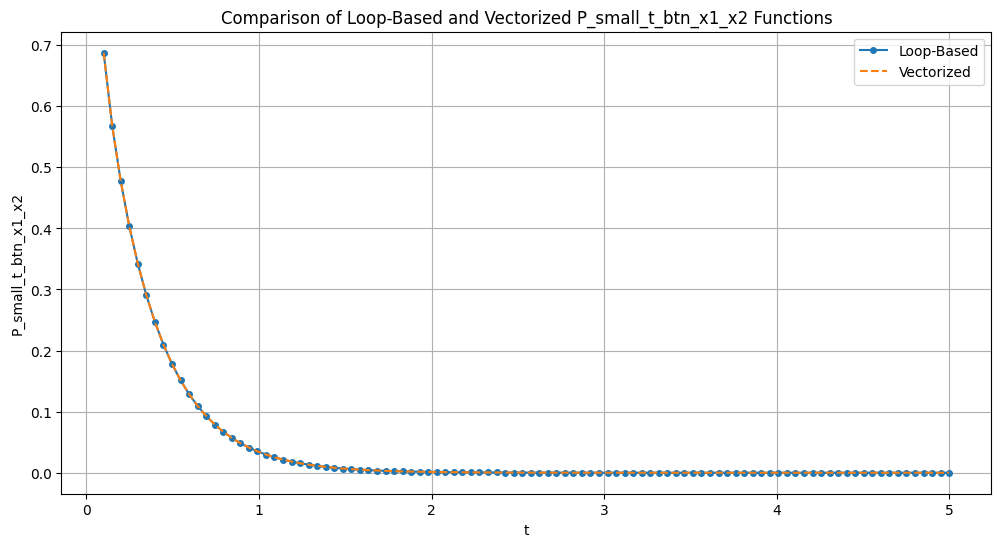

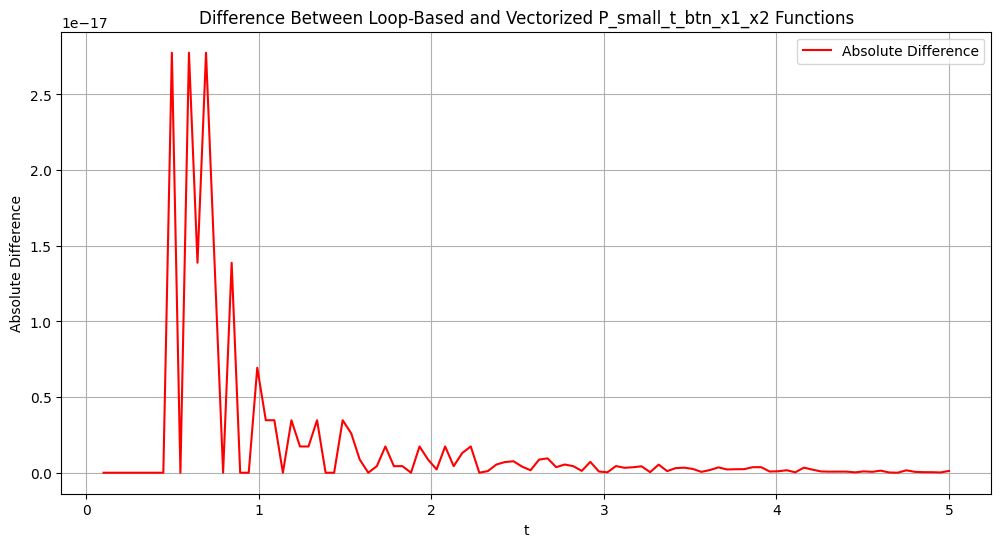

In [7]:
import time
from psiam_tied_no_dv_map_utils import P_small_t_btn_x1_x2
# Parameters
ABL = 40           # Arbitrary Base Level
ILD = 4            # In-Layer Depth
rate_lambda = 0.1  # Rate Lambda
T_0 = 1.0e-3       # Time constant
theta_E = 40       # Theta E
Z_E = 1.0          # Z E
K_max = 10         # Maximum k value for summation

# Define x1 and x2
x1 = 0.5
x2 = 1.5

# Generate a range of t values
t_values = np.linspace(0.1, 5, 100)  # Avoid t=0 to prevent division by zero

# Initialize lists to store CDF values
results_loop = []
results_vectorized = []

# Compute using Loop-Based Function
print("Computing P_small_t_btn_x1_x2 using loop-based function...")
start_time_loop = time.time()
for idx, t in enumerate(t_values):
    res = P_small_t_btn_x1_x2(x1, x2, t, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max)
    results_loop.append(res)
    if (idx + 1) % 20 == 0:
        print(f"  Completed {idx + 1} out of {len(t_values)} t-values")
end_time_loop = time.time()
loop_duration = end_time_loop - start_time_loop
print(f"Loop-Based Function Time: {loop_duration:.4f} seconds\n")

# Compute using Vectorized Function
print("Computing P_small_t_btn_x1_x2 using vectorized function...")
start_time_vectorized = time.time()
for idx, t in enumerate(t_values):
    res = P_small_t_btn_x1_x2_vectorized(x1, x2, t, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max)
    results_vectorized.append(res)
    if (idx + 1) % 20 == 0:
        print(f"  Completed {idx + 1} out of {len(t_values)} t-values")
end_time_vectorized = time.time()
vectorized_duration = end_time_vectorized - start_time_vectorized
print(f"Vectorized Function Time: {vectorized_duration:.4f} seconds\n")

# Convert lists to NumPy arrays for easier handling
results_loop = np.array(results_loop)
results_vectorized = np.array(results_vectorized)

# Compute the absolute difference
difference = np.abs(results_loop - results_vectorized)

# Print maximum difference
max_diff = np.max(difference)
print(f"Maximum difference between loop-based and vectorized results: {max_diff:.2e}\n")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_values, results_loop, label='Loop-Based', linestyle='-', marker='o', markersize=4)
plt.plot(t_values, results_vectorized, label='Vectorized', linestyle='--')
plt.xlabel('t')
plt.ylabel('P_small_t_btn_x1_x2')
plt.title('Comparison of Loop-Based and Vectorized P_small_t_btn_x1_x2 Functions')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(t_values, difference, label='Absolute Difference', color='red')
plt.xlabel('t')
plt.ylabel('Absolute Difference')
plt.title('Difference Between Loop-Based and Vectorized P_small_t_btn_x1_x2 Functions')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from psiam_tied_no_dv_map_utils import rho_A_t_fn

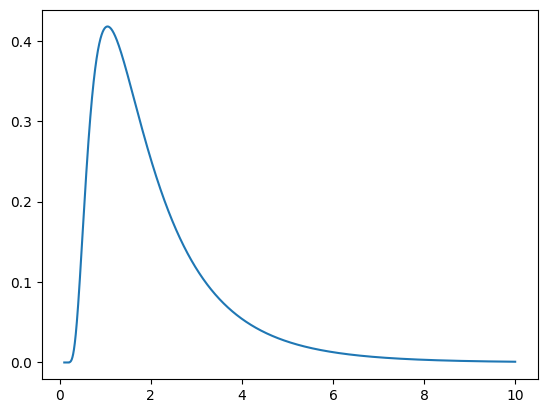

In [25]:
ABL = 40           # Arbitrary Base Level
ILD = 4            # In-Layer Depth
rate_lambda = 0.1  # Rate Lambda
T_0 = 0.1e-3       # Time constant
theta_E = 40       # Theta E
Z_E = 0          # Z E
bound = 1          # Bound flag (0 or 1) - Not used in this function
K_max = 10         # Maximum k value for summation

t_stim = 0.21
V_A = 1
theta_A = 2

t_A_aff = 0.02
t_motor = 0.03
t_E_aff = 0.04

x1 = 1; x2 = 2
t_values = np.arange(0.1, 10, 0.001)
def unknown_integral(t):
    return rho_A_t_fn(t - t_A_aff - t_motor, V_A, theta_A) * ( CDF_E_minus_small_t_NORM_fn_vectorized(t - t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max) + \
                                                 P_small_t_btn_x1_x2_vectorized(x1, x2, t - t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max) )

uk_arr = [unknown_integral(t) for t in t_values]
plt.plot(t_values, uk_arr);



In [26]:
import time
from scipy.integrate import trapezoid

# Measure start time
start_time = time.time()

# Calculate the integral
integral = trapezoid(uk_arr, t_values)

# Measure end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the integral and the time taken
print(f"Integral: {integral}")
print(f"Time taken: {duration:.6f} seconds")

Integral: 0.8616549768872684
Time taken: 0.001235 seconds


In [28]:
from  psiam_tied_no_dv_map_utils import rho_E_minus_small_t_NORM_fn, cum_A_t_fn

def up_RTs_fit__VEC_fn(t_pts, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max):
    """
    PDF of up RTs array
    """
    bound = 1

    P_A = [rho_A_t_fn(t-t_A_aff-t_motor, V_A, theta_A) for t in t_pts]
    P_EA_btn_1_2 = [P_small_t_btn_x1_x2_vectorized(1, 2, t-t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max) for t in t_pts]
    P_E_plus_cum = np.zeros(len(t_pts))
    for i,t in enumerate(t_pts):
        t1 = t - t_motor - t_stim - t_E_aff
        t2 = t - t_stim
        # if t1 < 0:
        #     t1 = 0
        P_E_plus_cum[i] = CDF_E_minus_small_t_NORM_fn_vectorized(t2, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max) \
                    - CDF_E_minus_small_t_NORM_fn_vectorized(t1, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max)


    P_E_plus = [rho_E_minus_small_t_NORM_fn(t-t_E_aff-t_stim-t_motor, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max) for t in t_pts]
    C_A = [cum_A_t_fn(t-t_A_aff-t_motor, V_A, theta_A) for t in t_pts]

    P_A = np.array(P_A); P_EA_btn_1_2 = np.array(P_EA_btn_1_2); P_E_plus = np.array(P_E_plus); C_A = np.array(C_A)
    P_correct_unnorm = (P_A*(P_EA_btn_1_2 + P_E_plus_cum) + P_E_plus*(1-C_A))
    return P_correct_unnorm

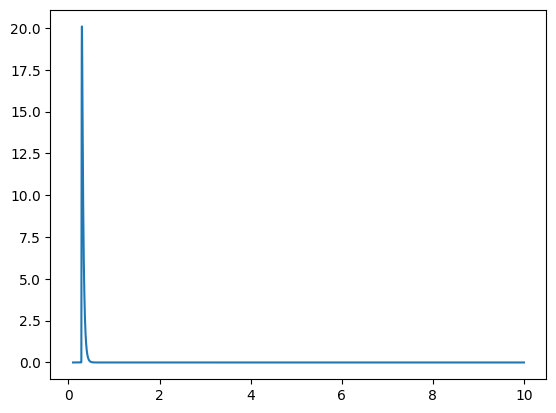

In [29]:
up_vec_arr = up_RTs_fit__VEC_fn(t_values, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max)
plt.plot(t_values, up_vec_arr);


In [30]:
import time

# Measure start time
start_time = time.time()

# Calculate the integral
integral = trapezoid(up_vec_arr, t_values)

# Measure end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the integral and the time taken
print(f"Integral: {integral}")
print(f"Time taken: {duration:.6f} seconds")


Integral: 0.863143533371077
Time taken: 0.000411 seconds


# interpol

In [68]:
import numpy as np

def rho_A_t_fn_vectorized(t):
    """
    Vectorized probability density function of t given V_A and theta_A.
    
    Parameters:
    - t (float or np.ndarray): Time variable(s).
    - V_A (float): Parameter related to velocity or rate.
    - theta_A (float): Parameter related to shape or scale.
    
    Returns:
    - float or np.ndarray: Probability density value(s).
    """
    # Convert t to a NumPy array for vectorized operations
    t = np.asarray(t)
    
    # Initialize the result array with zeros, same shape as t
    rho = np.zeros_like(t, dtype=np.float64)
    
    # Define a mask for t > 0 to avoid division by zero and invalid exponentials
    mask = t > 0
    
    # Compute the probability density only where t > 0
    rho[mask] = (theta_A / np.sqrt(2 * np.pi * (t[mask])**3)) * np.exp(
        -0.5 * (V_A**2) * (((t[mask]) - (theta_A / V_A))**2) / (t[mask])
    )
    
    return rho


In [69]:
import numpy as np

def unknown_integral_vectorized(t):
    """
    Vectorized computation of unknown_integral for array or scalar t.
    
    Parameters:
    - t: Scalar or NumPy array of time values.
    - t_A_aff, t_motor, V_A, theta_A, t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max, x1, x2:
      Parameters required by the constituent functions.
      
    Returns:
    - NumPy array of computed integral values corresponding to each t.
    """
    # Compute the argument for rho_A_t_fn
    rho_arg = t - t_A_aff - t_motor  # This will be array if t is array
    
    # Compute rho_A_t_fn values
    rho_values = rho_A_t_fn_vectorized(rho_arg)  # Vectorized operation
    
    # Compute the argument for CDF function
    cdf_arg = t - t_stim
    
    # Compute CDF values
    cdf_values = CDF_E_minus_small_t_NORM_fn_vectorized(cdf_arg, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max)
    
    # Compute P_small_t_btn_x1_x2 values
    p_small_values = P_small_t_btn_x1_x2_vectorized(x1, x2, cdf_arg, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max)
    
    # Compute the final integral
    integral = rho_values * (cdf_values + p_small_values)
    
    return integral


In [70]:
import time

ABL = 40           # Arbitrary Base Level
ILD = 4            # In-Layer Depth
rate_lambda = 0.1  # Rate Lambda
T_0 = 0.1e-3       # Time constant
theta_E = 40       # Theta E
Z_E = 0          # Z E
bound = 1          # Bound flag (0 or 1) - Not used in this function
K_max = 10         # Maximum k value for summation

t_stim = 0.21
V_A = 1
theta_A = 2

t_A_aff = 0.02
t_motor = 0.03
t_E_aff = 0.04

x1 = 1; x2 = 2

t_stim_vals = np.arange(0.2,2.3, 0.1)
t_values = np.arange(0.1, 10, 0.001)
def unknown_integral(t):
    return rho_A_t_fn(t - t_A_aff - t_motor, V_A, theta_A) * ( CDF_E_minus_small_t_NORM_fn_vectorized(t - t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max) + \
                                                 P_small_t_btn_x1_x2_vectorized(x1, x2, t - t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max) )


# Measure start time
start_time = time.time()

integral_vs_tstim = np.zeros_like(t_stim_vals)
for idx, t_stim in enumerate(t_stim_vals):
    uk_arr = unknown_integral_vectorized(t_values) # vectorized function TODO
    integral_vs_tstim[idx] = trapezoid(uk_arr, t_values)

# Measure end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the time taken
print(f"Time taken: {duration:.6f} seconds")

plt.plot(t_stim_vals, integral_vs_tstim);

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [61]:
t_stim = 1.836
uk_arr = [unknown_integral(t) for t in t_values]
trapezoid(uk_arr, t_values)

0.3736104064557335

In [63]:
from scipy.interpolate import interp1d

# Target t value
t_target = t_stim

# Perform linear interpolation
integral_at_t = np.interp(t_target, t_stim_vals, integral_vs_tstim)
# Create the cubic interpolation function
cubic_interp_func = interp1d(
    t_stim_vals, 
    integral_vs_tstim, 
    kind='cubic', 
    fill_value="extrapolate",  # Allows extrapolation outside the data range
    assume_sorted=True         # Assumes input data is sorted
)

print(f"Interpolated integral at t = {t_target}: {cubic_interp_func(t_target)}")
print(integral_at_t)

Interpolated integral at t = 1.836: 0.37361044664859394
0.3738424706785345


# check p_up with interpolation vs p_up with numeric integ

In [41]:
# direct
t_stim = 0.3
up_vec_arr = up_RTs_fit__VEC_fn(t_values, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max)
trapezoid(up_vec_arr, t_values)

0.8625611402406342

In [ ]:
from psiam_tied_no_dv_map_utils import CDF_E_minus_small_t_NORM_fn_vectorized
# def known_integral(t):


# all vectorized

In [71]:
import numpy as np

def CDF_E_minus_small_t_NORM_fn_vectorized(t, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max):
    """
    Vectorized version of the CDF of hitting the lower bound in normalized time.
    Utilizes custom phi and M functions.

    Parameters:
    - t (float or np.ndarray): Time variable(s).
    - ABL, ILD, rate_lambda, T_0, theta_E, Z_E (float): Model parameters.
    - bound (int): Bound flag (0 or 1).
    - K_max (int): Maximum k value for summation.

    Returns:
    - np.ndarray: CDF values corresponding to each t.
    """
    # Convert t to a NumPy array for vectorized operations
    t = np.asarray(t, dtype=np.float64)
    
    # Initialize the CDF result array with zeros
    CDF = np.zeros_like(t, dtype=np.float64)
    
    # Create a boolean mask where t > 0
    mask = t > 0
    
    if not np.any(mask):
        # If all t <= 0, return the initialized CDF (all zeros)
        return CDF
    
    # Extract only the t values where t > 0 for computation
    t_valid = t[mask]
    
    q_e = 1
    theta = theta_E * q_e

    chi = 17.37
    v = theta_E * np.tanh(rate_lambda * ILD / chi)
    w = (Z_E + theta) / (2 * theta)
    a = 2
    if bound == 1:
        v = -v
        w = 1 - w

    t_theta = T_0 * (theta_E ** 2) * (10 ** (-rate_lambda * ABL / 20)) * (1 / (2 * np.cosh(rate_lambda * ILD / chi)))
    t_normalized = t_valid / t_theta

    # Compute the exponential component of the CDF
    result = np.exp(-v * a * w - ((v ** 2) * t_normalized) / 2)

    # Create the k array
    k = np.arange(K_max + 1)
    
    # Determine even indices
    is_even = (k % 2 == 0).astype(float)
    
    # Compute r_k using broadcasting
    r_k = k * a + a * np.where(is_even, w, 1 - w)  # Shape: (K_max + 1,)
    
    # Compute sqrt(t_normalized) and handle zero to avoid division by zero
    sqrt_t = np.sqrt(t_normalized)
    sqrt_t = np.where(sqrt_t == 0, 1e-10, sqrt_t)  # Shape: (num_valid_t,)
    
    # Reshape r_k and sqrt_t for broadcasting
    # r_k: (K_max +1, 1)
    # sqrt_t: (1, num_valid_t)
    # This allows broadcasting to compute r_k / sqrt_t for all combinations
    r_k = r_k[:, np.newaxis]  # Shape: (K_max +1, 1)
    sqrt_t = sqrt_t[np.newaxis, :]  # Shape: (1, num_valid_t)
    
    # Compute phi arguments
    phi_args = r_k / sqrt_t  # Shape: (K_max +1, num_valid_t)
    
    # Compute M function arguments
    M_args_positive = (r_k - v * t_normalized) / sqrt_t  # Shape: (K_max +1, num_valid_t)
    M_args_negative = (r_k + v * t_normalized) / sqrt_t  # Shape: (K_max +1, num_valid_t)
    
    # Compute phi and M values
    phi_vals = phi(phi_args)  # Assuming phi is vectorized: Shape: (K_max +1, num_valid_t)
    M_vals = M(M_args_positive) + M(M_args_negative)  # Assuming M is vectorized
    
    # Compute sign terms
    sign = (-1) ** k  # Shape: (K_max +1,)
    sign = sign[:, np.newaxis]  # Shape: (K_max +1, 1)
    
    # Compute the summation across k
    summation = np.sum(sign * phi_vals * M_vals, axis=0)  # Shape: (num_valid_t,)
    
    # Compute the final CDF values for valid t
    CDF_valid = result * summation  # Shape: (num_valid_t,)
    
    # Assign the computed CDF values back to the original array
    CDF[mask] = CDF_valid
    
    return CDF


In [76]:
def rho_A_t_fn_vectorized(t, V_A, theta_A):
    """
    Vectorized probability density function of t given V_A and theta_A.
    
    Parameters:
    - t (float or np.ndarray): Time variable(s).
    - V_A (float): Parameter related to velocity or rate.
    - theta_A (float): Parameter related to shape or scale.
    
    Returns:
    - float or np.ndarray: Probability density value(s).
    """
    # Convert t to a NumPy array for vectorized operations
    t = np.asarray(t)
    
    # Initialize the result array with zeros, same shape as t
    rho = np.zeros_like(t, dtype=np.float64)
    
    # Define a mask for t > 0 to avoid division by zero and invalid exponentials
    mask = t > 0
    
    # Compute the probability density only where t > 0
    rho[mask] = (theta_A / np.sqrt(2 * np.pi * (t[mask])**3)) * np.exp(
        -0.5 * (V_A**2) * (((t[mask]) - (theta_A / V_A))**2) / (t[mask])
    )
    
    return rho


In [79]:
import numpy as np
from scipy.special import erf

def Phi(x):
    """
    Define the normal cumulative distribution function Φ(x) using erf.
    """
    return 0.5 * (1 + erf(x / np.sqrt(2)))

def P_small_t_btn_x1_x2_vectorized(x1, x2, t, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max):
    """
    Vectorized version of the P_small_t_btn_x1_x2 function.
    Computes the integration of P_small(x,t) between x1 and x2 for each t.
    
    Parameters:
    - x1, x2 (float): Integration bounds.
    - t (float or np.ndarray): Time variable(s).
    - ABL, ILD, rate_lambda, T_0, theta_E, Z_E (float): Model parameters.
    - K_max (int): Maximum k value for summation.
    
    Returns:
    - np.ndarray: Integral values corresponding to each t.
    """
    # Convert t to a NumPy array for vectorized operations
    t = np.asarray(t, dtype=np.float64)
    
    # Initialize the result array with zeros
    integral = np.zeros_like(t, dtype=np.float64)
    
    # Create a boolean mask where t > 0
    mask = t > 0
    
    if not np.any(mask):
        # If no t > 0, return the initialized integral (all zeros)
        return integral
    
    # Extract valid t values
    t_valid = t[mask]
    
    # Constants and intermediate computations
    q_e = 1
    theta = theta_E * q_e

    chi = 17.37
    mu = theta_E * np.tanh(rate_lambda * ILD / chi)
    z = (Z_E / theta) + 1.0

    # Compute t_theta and normalize t
    t_theta = T_0 * (theta_E ** 2) * (10 ** (-rate_lambda * ABL / 20)) * (1 / (2 * np.cosh(rate_lambda * ILD / chi)))
    t_normalized = t_valid / t_theta

    # Compute sqrt(t_normalized) and handle potential division by zero
    sqrt_t = np.sqrt(t_normalized)
    sqrt_t = np.where(sqrt_t == 0, 1e-10, sqrt_t)
    
    # Create an array of n values from -K_max to K_max inclusive
    n = np.arange(-K_max, K_max + 1)  # Shape: (2*K_max +1,)
    
    # Compute exponentials for term1 and term2 (broadcasting over n)
    exp_term1 = np.exp(4 * mu * n)  # Shape: (2*K_max +1,)
    exp_term2 = np.exp(2 * mu * (2 * (1 - n) - z))  # Shape: (2*K_max +1,)
    
    # Reshape n for broadcasting
    n = n[:, np.newaxis]  # Shape: (2*K_max +1, 1)
    
    # Compute arguments for Phi functions in term1
    phi1_upper = (x2 - (z + 4 * n + mu * t_normalized)) / sqrt_t  # Shape: (2*K_max +1, num_valid_t)
    phi1_lower = (x1 - (z + 4 * n + mu * t_normalized)) / sqrt_t  # Shape: (2*K_max +1, num_valid_t)
    
    # Compute Phi for term1
    Phi_term1 = Phi(phi1_upper) - Phi(phi1_lower)  # Shape: (2*K_max +1, num_valid_t)
    
    # Compute arguments for Phi functions in term2
    phi2_upper = (x2 - (-z + 4 * (1 - n) + mu * t_normalized)) / sqrt_t  # Shape: (2*K_max +1, num_valid_t)
    phi2_lower = (x1 - (-z + 4 * (1 - n) + mu * t_normalized)) / sqrt_t  # Shape: (2*K_max +1, num_valid_t)
    
    # Compute Phi for term2
    Phi_term2 = Phi(phi2_upper) - Phi(phi2_lower)  # Shape: (2*K_max +1, num_valid_t)
    
    # Compute term1 and term2
    term1 = exp_term1[:, np.newaxis] * Phi_term1  # Shape: (2*K_max +1, num_valid_t)
    term2 = exp_term2[:, np.newaxis] * Phi_term2  # Shape: (2*K_max +1, num_valid_t)
    
    # Compute the result by summing over all n
    result = np.sum(term1 - term2, axis=0)  # Shape: (num_valid_t,)
    
    # Assign the computed integral values back to the result array
    integral[mask] = result
    
    return integral


In [80]:
# unknow integral vectorized
def unknownn(t):
    return rho_A_t_fn_vectorized(t - t_A_aff - t_motor, V_A, theta_A) * ( CDF_E_minus_small_t_NORM_fn_vectorized(t - t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, bound, K_max) + \
                                                 P_small_t_btn_x1_x2_vectorized(x1, x2, t - t_stim, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, K_max) )

In [82]:
import time

t_stim_vals = np.arange(0.2, 2.3, 0.1)
t_values = np.arange(0, 10, 0.005)
# Measure start time
start_time = time.time()

for idx, t_stim in enumerate(t_stim_vals):
    uk_arr = unknownn(t_values)
    integral_vs_tstim[idx] = trapezoid(uk_arr, t_values)

# Measure end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the time taken
print(f"Time taken: {duration:.6f} seconds")

Time taken: 0.041178 seconds


# test it

In [87]:
t_stim = 0.464
up_vec_arr = up_RTs_fit__VEC_fn(t_values, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max)

print(f'calc integ {trapezoid(up_vec_arr, t_values)}')
cubic_interp_func = interp1d(
    t_stim_vals, 
    integral_vs_tstim, 
    kind='cubic', 
    fill_value="extrapolate",  # Allows extrapolation outside the data range
    assume_sorted=True         # Assumes input data is sorted
)

print(f"Interpolated integral at t = {t_stim}: {cubic_interp_func(t_stim)}")

calc integ 0.8531925086641742
Interpolated integral at t = 0.464: 0.8498973518774896
